In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

#import sys
#from os.path import isfile, join
#sys.path.insert(0, join(os.getcwd(),os.pardir))

In [3]:
FOLDER_PATH = "F:\\user\\Google Drive\\Catherning Folder\\THU\\Thesis\\Work\\Recipe datasets"
DATASET = ["scirep-cuisines-detail","Yummly28"]
FILES = ["cleaned_data.pkl","full_data.pkl"]

In [4]:
# FROM NN_classification
def createDFrame(file):
    
    dataset = DATASET[1]
    df = pd.read_pickle(os.path.join(
        FOLDER_PATH, dataset, file))
    df = df.set_index("id")
    len1 = len(df)

    dataset = DATASET[0]
    df2 = pd.read_pickle(os.path.join(
        FOLDER_PATH, dataset, file))
    df2["id"] = [len(df)+i for i in range(len(df2))]
    df2 = df2.set_index("id")
    df = pd.concat([df, df2],sort=False)
    if len(df)!=len1+len(df2):
        print("Error! Missing data")

    return df

df_train = createDFrame(FILES[1])
#df_train=pd.read_pickle(os.path.join(FOLDER_PATH,DATASET[1],FILES[1]))
#df_train=df_train.reset_index()
df_train

,index,cuisine,ingredients,all_ingredients
id,,,,
0,0.0,SouthernEuropean,"[baby_bella_mushroom_sliced, arborio_rice, oli...",baby_bella_mushroom_sliced;arborio_rice;olive_...
2,2.0,SouthernEuropean,"[garlic, extra-virgin_olive_oil_divided, madei...",garlic;extra-virgin_olive_oil_divided;madeira_...
3,3.0,WesternEuropean,"[garlic_halved, cooking_spray, peeled_red_pota...",garlic_halved;cooking_spray;peeled_red_potato_...
5,5.0,NorthAmerican,"[turkey_thawed, maple_syrup, bourbon, pickling...",turkey_thawed;maple_syrup;bourbon;pickling_spi...
6,6.0,NorthAmerican,"[beef_tenderloin__silver_skin_trimmed, worcest...",beef_tenderloin__silver_skin_trimmed;worcester...
7,7.0,SouthernEuropean,"[sugar_divided, amaretto_, frozen_pitted_dark_...",sugar_divided;amaretto_;frozen_pitted_dark_swe...
8,8.0,SouthernEuropean,[wheat_bread_crumb_made_from___wheat_bread_see...,wheat_bread_crumb_made_from___wheat_bread_see_...
9,9.0,NorthAmerican,"[uncooked_wild_rice, chopped_cooked_chicken_te...",uncooked_wild_rice;chopped_cooked_chicken_tend...
10,10.0,NorthAmerican,"[fresh_orange_juice, extra-virgin_olive_oil, r...",fresh_orange_juice;extra-virgin_olive_oil;red-...


# Data analysis

NorthAmerican       54022
SouthernEuropean     8963
LatinAmerican        6347
WesternEuropean      4243
Asian                3144
EastAsian            2788
SouthAsian           2078
SoutheastAsian        805
MiddleEastern         645
EasternEuropean       381
African               363
NorthernEuropean      250
Name: cuisine, dtype: int64

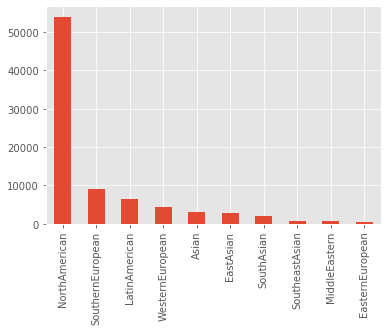

In [5]:
%matplotlib inline

plt.style.use('ggplot')
df_train['cuisine'].value_counts().head(10).plot(kind='bar')

df_train['cuisine'].value_counts()

In [57]:
df_train["nb_ingrs"]=[len(x) for x in df_train["ingredients"]]

In [209]:
# plot data
nbingr_cuis = df_train[df_train["nb_ingrs"]<40][["cuisine","nb_ingrs","index"]].groupby(["nb_ingrs","cuisine"]).count().unstack()

# DO relative, par rapport nb total dans chaque cuisine

In [216]:
nbingr_cuis.columns=nbingr_cuis.columns.droplevel()

In [218]:
for cuis,val in cuisine_count.iteritems():
    nbingr_cuis[cuis]=nbingr_cuis[cuis]/val

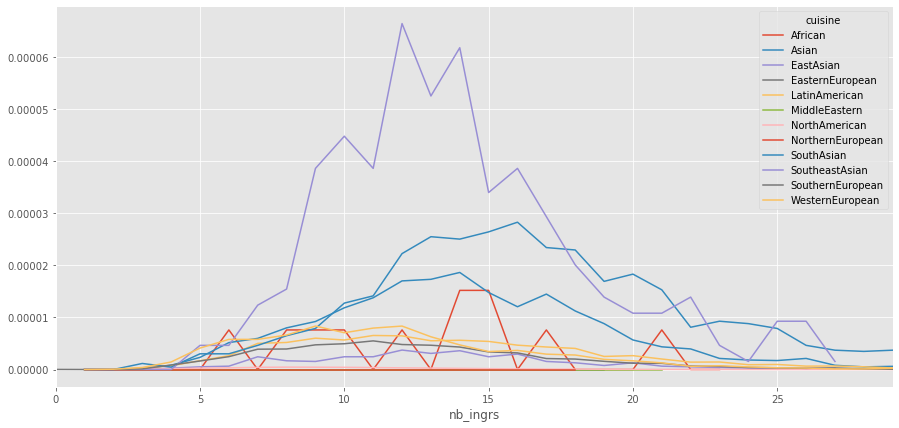

In [219]:
fig, ax = plt.subplots(figsize=(15,7))
nbingr_cuis.plot(ax=ax)
#x.legend(nbingr_cuis.columns.levels[1:]);

Results are worse when we remove American recipes!
Check what exactly are those results
See if we should remove american, if yes, how to improve score ???

### Counter for ingredients

In [7]:
counters = {}
for cuisine in df_train['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (df_train['cuisine'] == cuisine)
    for ingredients in df_train[indices]['ingredients']:
        counters[cuisine].update(ingredients)

In [11]:
counters['WesternEuropean'].most_common(10)

[('butter', 1620),
 ('egg', 1406),
 ('wheat', 1278),
 ('milk', 912),
 ('olive_oil', 727),
 ('onion', 724),
 ('cream', 659),
 ('black_pepper', 621),
 ('garlic', 546),
 ('salt', 511)]

In [18]:
top10 = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(10)] for cuisine in counters],
            index=[cuisine for cuisine in counters],
            columns=['top{}'.format(i) for i in range(1, 11)])
top10

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
SouthernEuropean,olive_oil,garlic,tomato,egg,onion,salt,butter,black_pepper,basil,parmesan_cheese
WesternEuropean,butter,egg,wheat,milk,olive_oil,onion,cream,black_pepper,garlic,salt
NorthAmerican,butter,egg,wheat,onion,milk,garlic,vegetable_oil,vanilla,cream,olive_oil
Asian,soy_sauce,vegetable_oil,sesame_oil,garlic,ginger,salt,rice,sugar,scallion,water
LatinAmerican,garlic,cayenne,onion,tomato,cumin,olive_oil,salt,vegetable_oil,cilantro,corn
SouthAsian,salt,turmeric,garam_masala,vegetable_oil,cumin,garlic,cumin_seed,coriander,cinnamon,cayenne
SoutheastAsian,garlic,vegetable_oil,fish,soy_sauce,cayenne,lime_juice,cilantro,rice,fish_sauce,ginger
EastAsian,soy_sauce,garlic,scallion,sesame_oil,cayenne,rice,ginger,vegetable_oil,black_pepper,soybean
African,olive_oil,onion,cumin,garlic,cayenne,cinnamon,wheat,coriander,bell_pepper,black_pepper
MiddleEastern,wheat,olive_oil,egg,onion,garlic,butter,lemon_juice,black_pepper,parsley,vegetable_oil


In [13]:
df_train['all_ingredients'].str.contains('garlic').value_counts()

False    55136
True     28893
Name: all_ingredients, dtype: int64

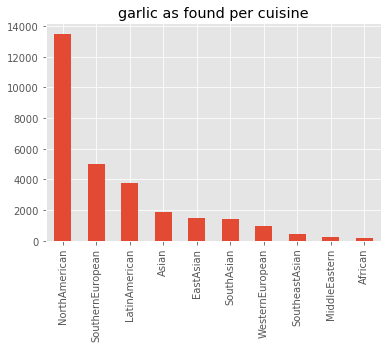

In [14]:
indices = df_train['all_ingredients'].str.contains('garlic')
df_train[indices]['cuisine'].value_counts().head(10).plot(kind='bar',
                                                 title='garlic as found per cuisine')

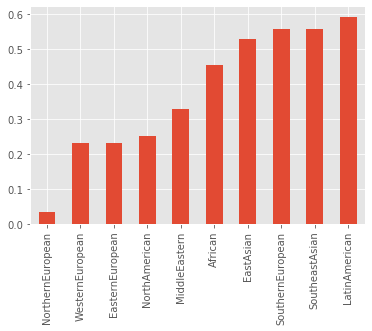

In [15]:
relative_freq = (df_train[indices]['cuisine'].value_counts() / df_train['cuisine'].value_counts())
relative_freq.sort_values(inplace=True)
relative_freq.head(10).plot(kind='bar')

In [16]:
unique = np.unique(top10.values.ravel())
unique.shape

(41,)

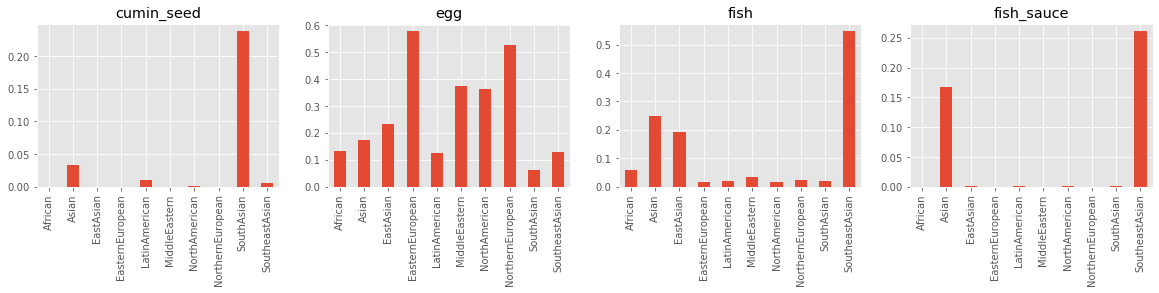

In [55]:
# spot ingredients which have a high degree of uniqueness
square_nb = 4

fig, axes = plt.subplots(1, square_nb, figsize=(20, 3))
for ingredient, ax_index in zip(unique[12:], range(square_nb)):
    indices = df_train['all_ingredients'].str.contains(ingredient)
    relative_freq = (df_train[indices]['cuisine'].value_counts() / df_train['cuisine'].value_counts())
    relative_freq.head(10).plot(kind='bar', ax=axes.ravel()[ax_index], title=ingredient)